# Prostate Prediction 

## Part 1: Exploratory Dataset Analysis

In [ ]:
## IMPORT THE NECESSARY LIBRARIES

import pandas as pd      # for data manipulation
import numpy as np       # useful for working with arrays
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns # data visualization
import itertools
import warnings
from sklearn import tree
from IPython.display import Image
import pydotplus as pydot 
warnings.filterwarnings("ignore")
#from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from yellowbrick.features.importances import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from numpy import set_printoptions
set_printoptions(precision=3)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## LOADING PROSTATE DATASET FROM MY COMPUTER

data_prostate = pd.read_csv("/content/drive/MyDrive/Research Topic/prostate.csv")

In [ ]:
data_prostate

,y,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V6024,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033
0,0,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,...,-0.029602,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001
1,0,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,...,-0.835899,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500
2,0,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,...,0.860446,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351
3,0,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,...,0.614026,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534
4,0,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,...,0.639511,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,3.843151,-0.812419,...,-0.081670,-0.812419,-0.812419,-0.217543,0.517631,0.424872,-0.812419,-0.812419,-0.812419,-0.001027
98,1,-0.798827,-0.551404,-0.416452,-0.798827,-0.798827,-0.798827,-0.551404,4.685605,-0.798827,...,-0.298417,-0.798827,-0.798827,-0.416452,0.268144,-0.798827,-0.798827,-0.798827,-0.798827,-0.145153
99,1,-0.783024,-0.783024,-0.534149,-0.783024,-0.783024,-0.783024,-0.783024,5.066788,-0.783024,...,-0.463852,-0.783024,-0.783024,-0.174171,0.320323,-0.783024,-0.783024,-0.783024,-0.783024,0.047432
100,1,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,4.016852,-0.832069,...,-0.832069,-0.832069,-0.832069,-0.832069,0.073101,-0.832069,-0.832069,-0.832069,-0.832069,0.035947


In [ ]:
data_prostate.isnull().sum().sum()

0

In [ ]:
## Print the Shape of prostate dataset
print('Shape Prostate:', data_prostate.shape)

Shape Prostate: (102, 6034)


In [ ]:
_0 = data_prostate[data_prostate['y'] == 0]
_1 =  data_prostate[data_prostate['y'] == 1]
print('Cases 0:{}'.format(len(_0)))
print('Cases 1:{}'.format(len(_1)))

Cases 0:50
Cases 1:52


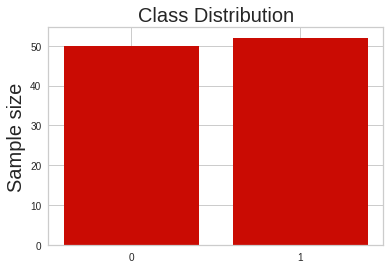

In [ ]:
classes = ('0', '1')
y_pos = np.arange(len(classes))
p = [50,52]
 
plt.bar(y_pos,p, color = 'r')
plt.xticks(y_pos, classes)
plt.ylabel('Sample size',fontsize = 20)
plt.xlabel('',fontsize = 20)
plt.title('Class Distribution', fontsize = 20)
 
plt.show()

## Part 2: Data Processing

In [ ]:
List_V_p = []
for i in range (1,6034):
    t_V = 'V' + str(i)
    List_V_p.append(t_V)

In [ ]:
X_prostate = data_prostate[List_V_p]

In [ ]:
X_prostate

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6024,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033
0,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,-1.097891,...,-0.029602,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001
1,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,-0.835899,...,-0.835899,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500
2,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,-1.154351,...,0.860446,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351
3,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,-1.121534,...,0.614026,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534
4,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,-1.121519,...,0.639511,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,-0.812419,3.843151,-0.812419,-0.812419,...,-0.081670,-0.812419,-0.812419,-0.217543,0.517631,0.424872,-0.812419,-0.812419,-0.812419,-0.001027
98,-0.798827,-0.551404,-0.416452,-0.798827,-0.798827,-0.798827,-0.551404,4.685605,-0.798827,-0.798827,...,-0.298417,-0.798827,-0.798827,-0.416452,0.268144,-0.798827,-0.798827,-0.798827,-0.798827,-0.145153
99,-0.783024,-0.783024,-0.534149,-0.783024,-0.783024,-0.783024,-0.783024,5.066788,-0.783024,-0.783024,...,-0.463852,-0.783024,-0.783024,-0.174171,0.320323,-0.783024,-0.783024,-0.783024,-0.783024,0.047432
100,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,-0.832069,4.016852,-0.832069,-0.832069,...,-0.832069,-0.832069,-0.832069,-0.832069,0.073101,-0.832069,-0.832069,-0.832069,-0.832069,0.035947


In [ ]:
Y_prostate = data_prostate[['y']]

In [ ]:
Y_prostate

,y
0,0
1,0
2,0
3,0
4,0
...,...
97,1
98,1
99,1
100,1


### Descriptive analysis (PCA ) to reduce de dimension of our dataset then apply a clustering method

### Note that for this part we will work only with features data not the response variable

In [ ]:
#Let's start by doing PCA

# The necessary libraries to import for PCA

from sklearn.preprocessing import StandardScaler  # for data standardization
from sklearn.decomposition import PCA # for dimension reduction

### First application of PCA

In [ ]:
# Performing principal components on standardized features_data dataset

pca = PCA(n_components = 102, svd_solver='full')
X_pca = pca.fit_transform(X_prostate)

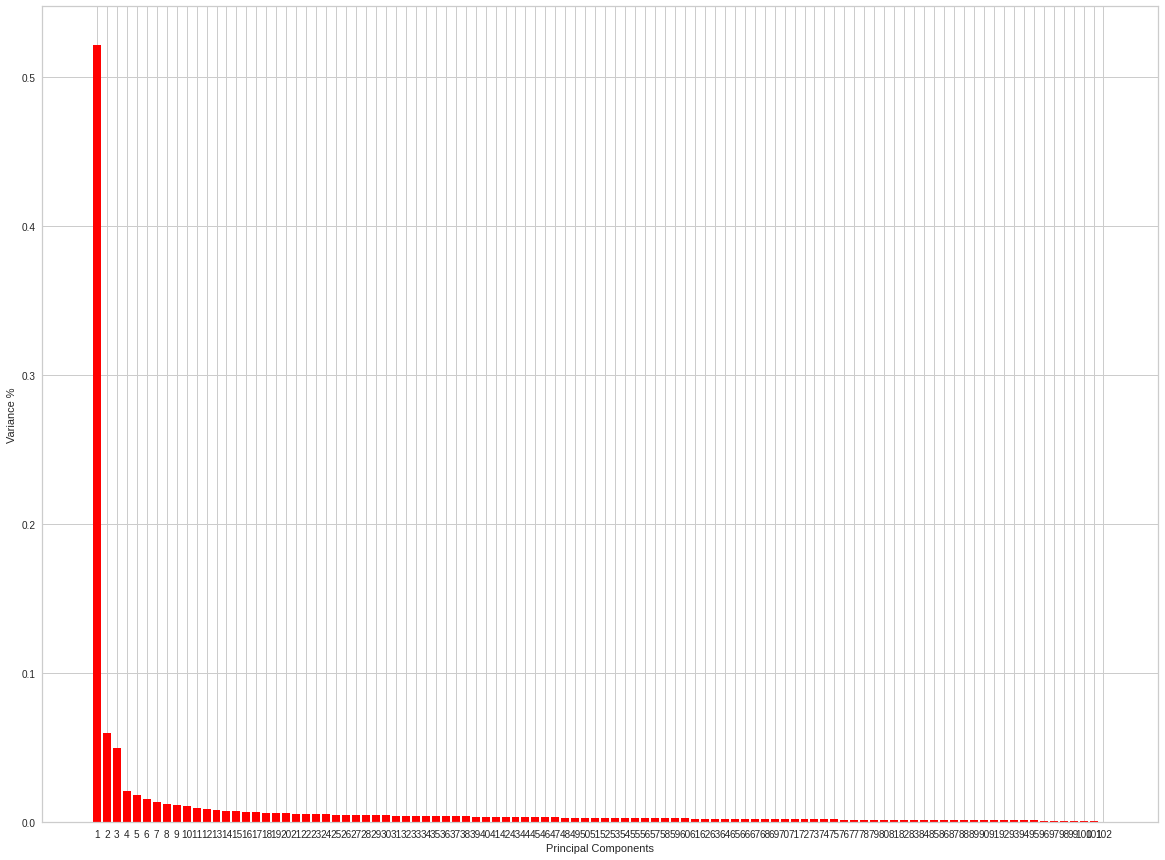

In [ ]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.gcf().set_size_inches(20, 15)
plt.xticks(PC)

# keeping principal components of whole_data dataset as a dataframe 
X_PCA_102components = pd.DataFrame(X_pca)

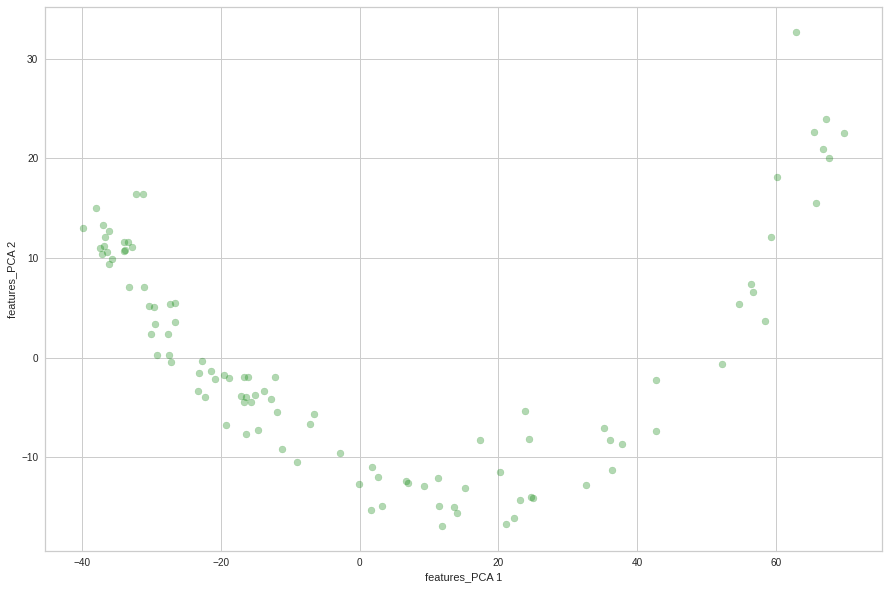

In [ ]:
# Visualizing the first two principal components

plt.scatter(X_PCA_102components[0], X_PCA_102components[1], alpha=.3, color='green')
plt.xlabel('features_PCA 1')
plt.ylabel('features_PCA 2')
plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
# Checking the total number of principal components that gives ~90% explained variability

pca.explained_variance_ratio_
summ=0
counter=0
for i in pca.explained_variance_ratio_:
    summ += i
    counter += 1
    if summ >= 1:
        break
print('Explained variability is {} and the number of PCs is {}'.format(summ,counter))

Explained variability is 1.0000000000000002 and the number of PCs is 101


In [ ]:
pca = PCA(n_components = 101, svd_solver='full')
X_pca = pca.fit_transform(X_prostate)

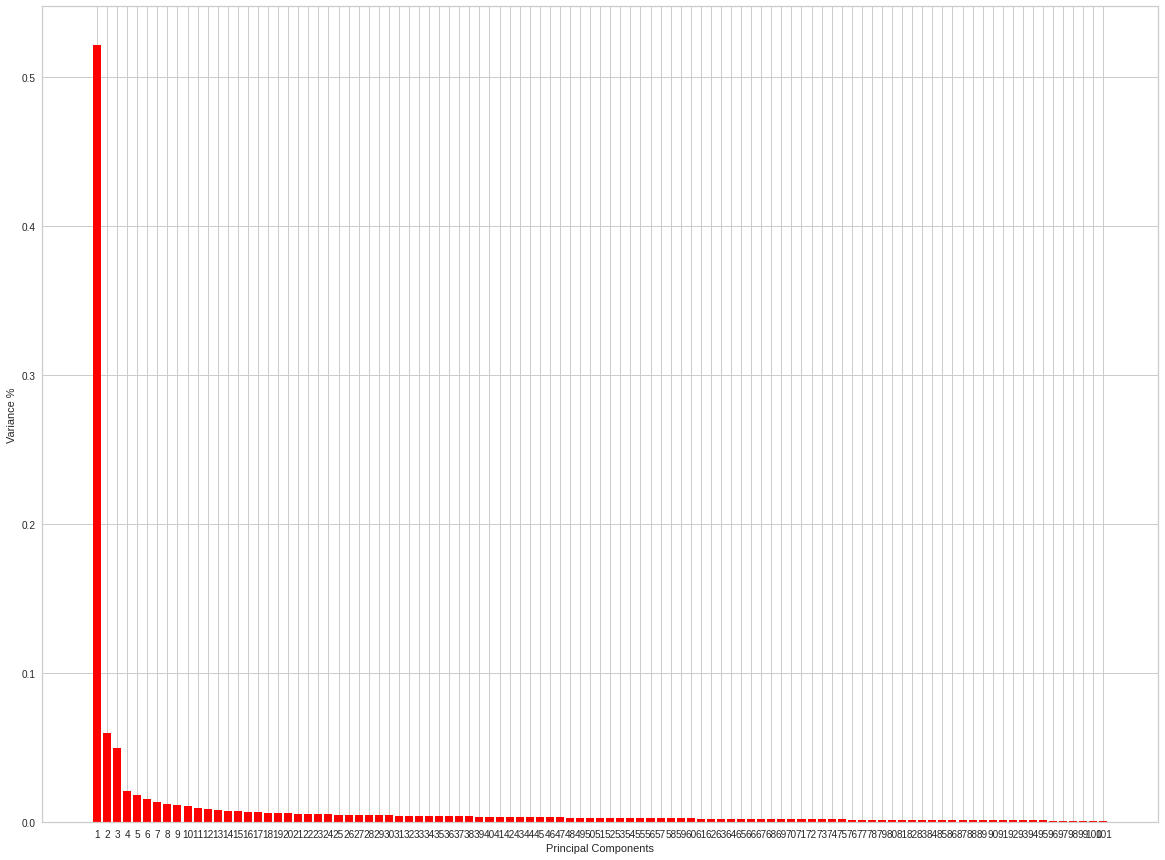

In [ ]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.gcf().set_size_inches(20, 15)
plt.xticks(PC)

# keeping principal components of whole_data dataset as a dataframe 
X_PCA_101components = pd.DataFrame(X_pca)

In [ ]:
X_PCA_101components

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,9.210053,-12.902086,-0.675533,-1.107242,-5.672885,-0.454235,12.505520,-1.498462,7.662548,2.391732,...,-0.085334,0.001020,-0.178448,0.177734,-0.581267,0.244371,-0.507286,0.014793,-0.072140,0.377462
1,-37.108110,10.434557,8.597900,7.840083,4.918430,-3.319310,4.765529,1.851744,1.865300,3.669490,...,-2.315250,3.445169,0.957201,0.066418,-3.323861,5.515368,2.505616,-1.506940,-4.609940,0.327016
2,58.463692,3.641841,-3.743321,-3.818528,6.364090,-7.254525,-1.804073,-2.015053,-1.130454,-2.879593,...,-0.133820,-0.116937,0.044766,-0.218100,0.165539,-0.046594,-0.178806,-0.025631,0.037687,0.015988
3,36.338229,-11.267782,-6.552250,-1.111311,9.440094,-3.065037,5.935391,-3.674371,-3.988591,1.411446,...,-0.082633,-0.114545,0.089230,0.042197,-0.017419,-0.138327,0.261239,0.039356,-0.053351,-0.253875
4,42.700767,-7.308713,-2.459005,10.052700,4.462445,-4.856633,-6.077546,4.927911,-9.462537,2.253129,...,-0.063724,0.224539,-0.103112,0.074729,0.197438,-0.086309,0.216557,-0.074593,-0.116184,-0.130505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-32.192447,16.434736,-12.407812,3.043692,-0.296539,-5.380631,5.227352,2.234770,-2.997246,-5.489362,...,0.812724,0.999518,-0.939130,0.343607,-0.089443,-0.830316,-0.055189,0.381275,-0.287648,0.446245
98,-31.053289,7.091814,4.137286,8.755307,-0.782338,-0.709685,-4.780938,1.030409,1.927522,-6.458759,...,2.725373,0.186821,0.732003,-0.350227,0.946795,-1.156455,0.996144,0.702121,-0.603885,0.010599
99,-31.191475,16.418543,-12.628526,0.787107,-2.081492,-3.857090,2.722132,2.993442,-7.394007,-9.717228,...,-0.789191,0.997153,0.444198,0.105715,0.445230,0.030885,0.419999,0.517949,-0.118376,0.115842
100,-36.141157,12.698187,-4.451217,6.280963,-4.604144,-2.809297,4.955351,0.039555,-2.358429,-1.942316,...,-2.957998,-1.267047,5.733208,1.340836,-1.185093,-3.735510,-1.936685,-1.597322,-0.759520,1.568232


Based on the number of components select, we can use our pca components on features as our new data for Clustering (Kmeans or HAC)

In our case for example to perform Kmeans, we will use this "X_PCA_44components"

In [ ]:
# To start we need to import this library to split our data in train and test data
from sklearn.model_selection import train_test_split # for data splitting 

# X_data (the features) is the PCA components
X_data = X_PCA_101components

# Y_data is the response variable
Y_data = Y_prostate

## PART 3: Model Building, Supervised Learning Methods

To perform supervised methods methods, we need **Features and Response Variable**

Since the PCA components explain 100% of our initial data, we will use it as features instead of using the original data

## Now after splitting our data

* the X_train and y_train will be use for training the model (fit the model) 
* The X_test will be use for prediction
* The y_test will be used for testing the performance

In [ ]:
## We should split our data 2 parts
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.20, random_state = 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_prostate, Y_prostate, test_size = 0.20, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81, 101)
(21, 101)
(81, 1)
(21, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5238095238095238


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 7]
 [3 5]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.42      0.62      0.50         8

    accuracy                           0.52        21
   macro avg       0.54      0.54      0.52        21
weighted avg       0.57      0.52      0.53        21



# Support Vector Classifier

## SVC with C= 1000 and gamma = 0.001 with nonlinear kernel function 'rbf'

In [ ]:
# FUNCTION TO MAKE PREDICTIONS

def predictmodel(model):
    y_pred = model.predict(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)

Score: 0.8590909090909091
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.90      0.82      0.86        11

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21

Confusion Matrix:
[[9 1]
 [2 9]]


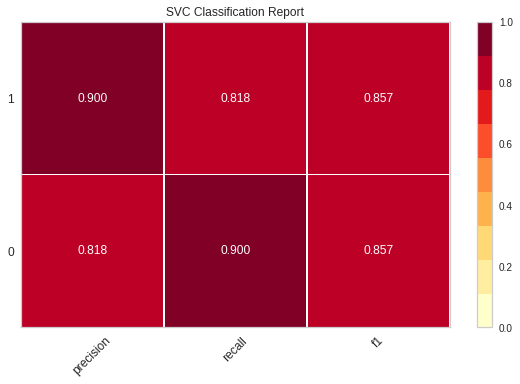

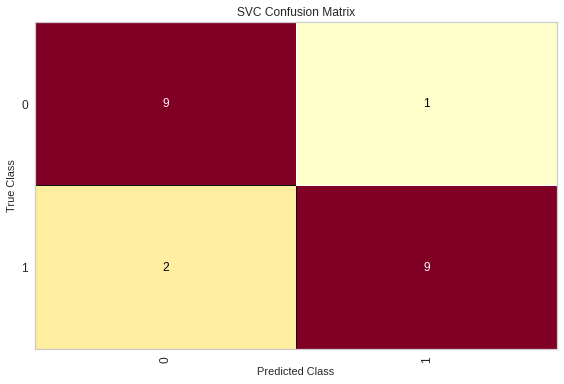

In [ ]:
#x = X_PCA_44components.loc[:,X_PCA_44components.columns.tolist()[:]]
#x = np.array(X_data)
#Y = np.array(Y_data)
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.20,random_state=2700) 
SVM =SVC(kernel="rbf", C=1000, gamma = 0.001, decision_function_shape='ovo', probability=True)
SVM.fit(x_train , y_train)
predictmodel(SVM)

visualizer = ClassificationReport(SVM)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()
cm = ConfusionMatrix(SVM, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.poof()

## SVC with nonlimear kernel and C = 100 and gamaa = 1

In [ ]:
SVM =SVC(kernel="rbf", C=100, gamma =1, decision_function_shape='ovr')
SVM.fit(X_train , y_train)
predictmodel(SVM)

Score: 0.3772727272727273
Classification report:
              precision    recall  f1-score   support

           0       0.33      0.30      0.32        10
           1       0.42      0.45      0.43        11

    accuracy                           0.38        21
   macro avg       0.38      0.38      0.38        21
weighted avg       0.38      0.38      0.38        21

Confusion Matrix:
[[3 7]
 [6 5]]


## SVC with a linear kernet and c =1000 and gamaa 0.001

SVM =SVC(kernel="linear", C=1000, gamma =0.001, decision_function_shape='ovr')
SVM.fit(x_train , y_train)
predictmodel(SVM)

from sklearn.grid_search import GridSearchCV
 
svc = SVC()
 
param_grid = { 
           "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "C" : [1, 10, 100, 1000]}
 
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 10)
CV_svc.fit(x_train, y_train)
print(CV_svc.best_params_)

## Plot of accuracy against parameter C and against standard deviation

[0.5238095238095238, 0.9047619047619048, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]
[0.20000000000000004, 0.20591260281974, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018]


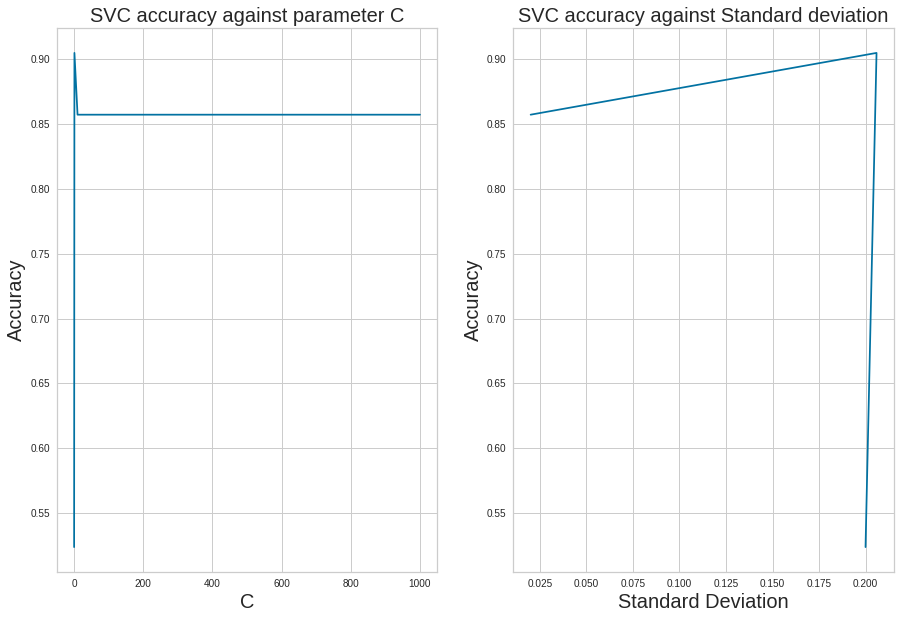

In [ ]:
P = [0.1,1,10, 100,200,300,400,500,600,700,800,900,1000]
L = []
jj = []
for i in range(len(P)):
    scv = SVC(C=P[i])   
    scv.fit(x_train, y_train)
    L.append(scv.score(x_test, y_test))
    jj.append(cross_val_score(scv, x_test, y_test).std())
print(L)
print(jj)
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)

plt.plot(P,L)
plt.xlabel("C",  fontsize = 20)
plt.title("SVC accuracy against parameter C",  fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)

plt.subplot(1,2,2)
plt.plot(jj,L)
plt.xlabel("Standard Deviation", fontsize = 20)
plt.title("SVC accuracy against Standard deviation",  fontsize = 20)
plt.ylabel("Accuracy",  fontsize = 20)
plt.show()

[0.5714285714285714, 0.8095238095238095, 0.9047619047619048, 0.6666666666666666, 0.5238095238095238, 0.5238095238095238]


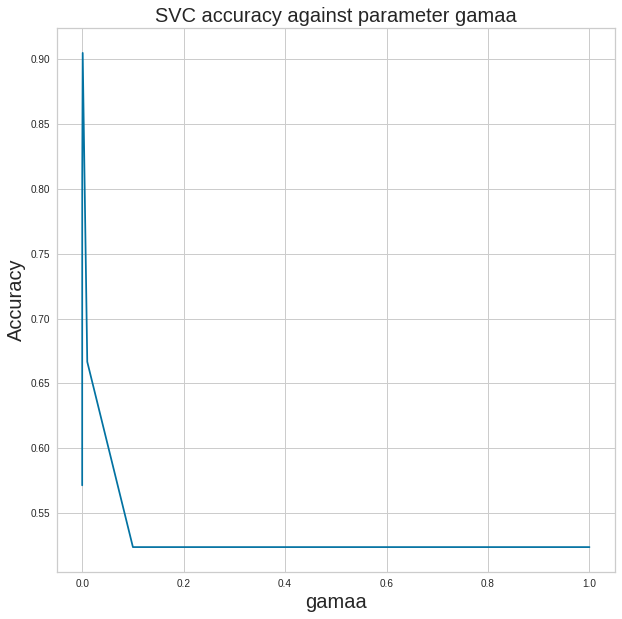

In [ ]:
G= [0.00001,0.0001,0.001,0.01,0.1,1]
LL= []

for i in range(len(G)):
    scv = SVC(gamma = G[i])   
    scv.fit(x_train, y_train)
    LL.append(scv.score(x_test, y_test))
print(LL)

plt.figure(figsize = (10,10))
plt.plot(G,LL)
plt.xlabel("gamaa",  fontsize = 20)
plt.title("SVC accuracy against parameter gamaa",  fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.show()

In [ ]:
SVM =SVC(kernel="rbf", C=1000, gamma = 0.001, decision_function_shape='ovo', probability=True)
SVM.fit(x_train , y_train)
y_pred_prob = SVM.predict_proba(x_test)[:, 0]
y_pred_probs = SVM.predict_proba(x_test)[:, 1]
y_pred_probC = SVM.predict_proba(x_test)
y_pred= SVM.predict(x_test)
print(y_pred_prob[0:5])
print(y_pred_probs[0:5])
print(y_pred_probC )

[0.041 0.784 0.014 0.804 0.284]
[0.959 0.216 0.986 0.196 0.716]
[[0.041 0.959]
 [0.784 0.216]
 [0.014 0.986]
 [0.804 0.196]
 [0.284 0.716]
 [0.599 0.401]
 [0.95  0.05 ]
 [0.079 0.921]
 [0.667 0.333]
 [0.005 0.995]
 [0.945 0.055]
 [0.077 0.923]
 [0.148 0.852]
 [0.229 0.771]
 [0.994 0.006]
 [0.692 0.308]
 [0.722 0.278]
 [0.852 0.148]
 [0.22  0.78 ]
 [0.602 0.398]
 [0.107 0.893]]


# Nueral Network- MultiLayer Percetron (MLP)

In [ ]:
def predictmodelMLP(model):
    y_pred = model.predict(x_tests)
    f,t,thresholds = metrics.roc_curve(y_tests,y_pred)
    cm = metrics.confusion_matrix(y_tests,y_pred)
    
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_tests,y_pred))
    print("Confusion Matrix:")
    print(cm)

Score: 0.8090909090909092
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21

Confusion Matrix:
[[8 2]
 [2 9]]
Training set score: 1.000000
Test set score: 0.809524


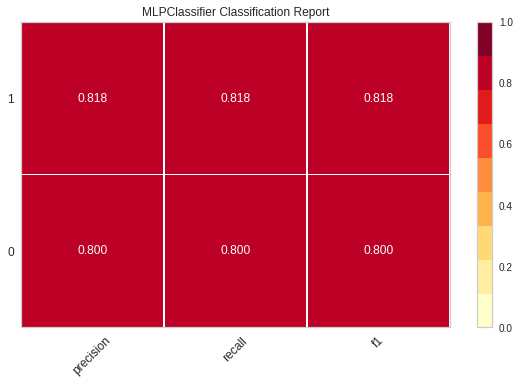

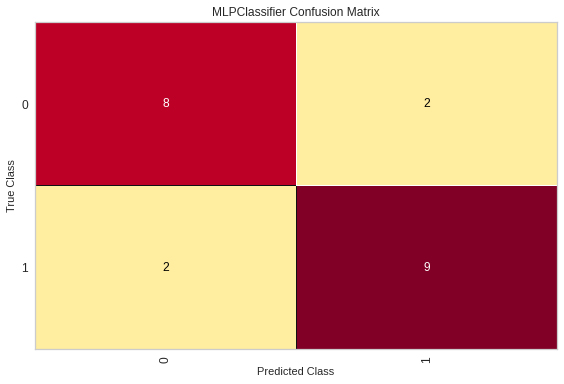

In [ ]:
x_trains,x_tests,y_trains,y_tests = train_test_split(X_data,Y_data,test_size=0.2,random_state=2700)
scaler = StandardScaler()
scaler.fit(x_trains)
x_trains = scaler.transform(x_trains)
scaler.fit(x_tests)
x_tests = scaler.transform(x_tests) 

clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, learning_rate='constant', learning_rate_init=0.01, max_iter=1000,random_state=2700, shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1)
clf.fit(x_trains, y_trains)

predictmodelMLP(clf)
print("Training set score: %f" % clf.score(x_trains, y_trains))
print("Test set score: %f" % clf.score(x_tests, y_tests))

visualizer = ClassificationReport(clf)
visualizer.fit(x_trains, y_trains)
visualizer.score(x_tests, y_tests)
visualizer.poof()
cm = ConfusionMatrix(clf, classes=[0,1])
cm.fit(x_trains, y_trains)
cm.score(x_tests, y_tests)
cm.poof()

## MPL with apha = 0.01 and a learning_rate_init =0. 1 ,learning_rate=constant

In [ ]:
clf = MLPClassifier( activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, learning_rate='constant', learning_rate_init=0.1, max_iter=1000,random_state=2700, shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1)
clf.fit(x_trains, y_trains)
predictmodel(clf)

Score: 0.9045454545454545
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.91      0.91      0.91        11

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

Confusion Matrix:
[[ 9  1]
 [ 1 10]]


## k-nearest neighbors 

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  2]
 [ 1  7]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.78      0.88      0.82         8

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.85        21
weighted avg       0.86      0.86      0.86        21



Text(0, 0.5, 'Mean Error')

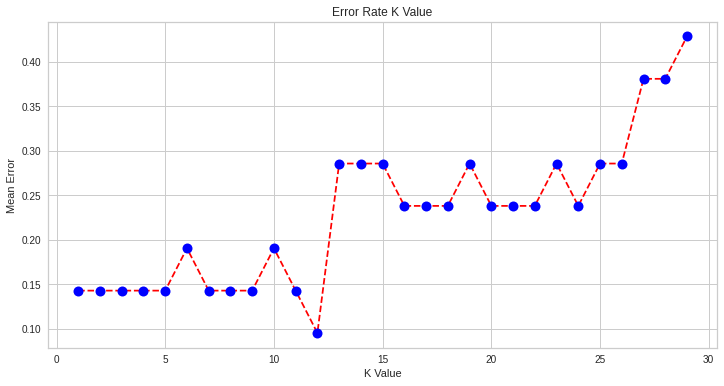

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(pred_i.shape[0], 1)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# load dataset


scaler = StandardScaler()
scaler.fit(X_data)
X= scaler.transform(X_data)


results = []
names = []
scoring = 'accuracy'
models = []
models.append(( ' DT ' , DecisionTreeClassifier()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' SVM ' , SVC()))
models.append(( ' MLP ' ,  MLPClassifier()))
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model,X, Y_data, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison with full dataset and defualt parameter')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel("Accuracy", fontsize=20)
plt.xlabel("Classification Models", fontsize=20)
plt.show()

ValueError: ignored

In [ ]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X_data,Y_data,test_size=0.20,random_state=2700) 

In [ ]:
RF = RandomForestClassifier( random_state=1)  

RF_model = RF.fit(X_train, y_train)  

RF_model.score(X_train, y_train)

# Predictions/probs on the test dataset
predictedRF = pd.DataFrame(RF_model.predict(X_test))  
probsRF = pd.DataFrame(RF_model.predict_proba(X_test))

print(confusion_matrix(y_test, predictedRF))
print(classification_report(y_test, predictedRF))

[[8 5]
 [1 7]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.58      0.88      0.70         8

    accuracy                           0.71        21
   macro avg       0.74      0.75      0.71        21
weighted avg       0.77      0.71      0.72        21



In [ ]:
RF = RandomForestClassifier( random_state=2)  

RF_model = RF.fit(xx_train, yy_train)  

RF_model.score(xx_train, yy_train)

# Predictions/probs on the test dataset
predictedRF = pd.DataFrame(RF_model.predict(xx_test))  
probsRF = pd.DataFrame(RF_model.predict_proba(xx_test))

# Store metrics
RF_accuracy = metrics.accuracy_score(yy_test, predictedRF)  
RF_roc_auc = metrics.roc_auc_score(yy_test, probsRF[1])  
RF_confus_matrix = metrics.confusion_matrix(yy_test, predictedRF)
RF_classification_report = metrics.classification_report(yy_test, predictedRF)  
RF_precision = metrics.precision_score(yy_test, predictedRF, pos_label=1)  
RF_recall = metrics.recall_score(yy_test, predictedRF, pos_label=1)  
RF_f1 = metrics.f1_score(yy_test, predictedRF, pos_label=1)

# Evaluate the model using 10-fold cross-validation
RF_cv_scores = cross_val_score(RandomForestClassifier(random_state=2), xx_test, yy_test, scoring='precision', cv=10)  
RF_cv_mean = np.mean(RF_cv_scores)  
RF_cv_mean 


0.6

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_prostate, Y_prostate, train_size=0.80, test_size=0.20, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81, 6033)
(21, 6033)
(81, 1)
(21, 1)


In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, poly_pred))
print(classification_report(y_test, poly_pred))

print(confusion_matrix(y_test, rbf_pred))
print(classification_report(y_test, rbf_pred))

[[ 2 11]
 [ 1  7]]
              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.39      0.88      0.54         8

    accuracy                           0.43        21
   macro avg       0.53      0.51      0.39        21
weighted avg       0.56      0.43      0.36        21

[[ 0 13]
 [ 0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.38      1.00      0.55         8

    accuracy                           0.38        21
   macro avg       0.19      0.50      0.28        21
weighted avg       0.15      0.38      0.21        21



In [ ]:
svm_model = SVC(probability=True)  
svm_model = svm_model.fit(X_train, y_train)  
svm_model.score(X_train, y_train)
# Predictions/probs on the test dataset
SMpredicted = pd.DataFrame(svm_model.predict(X_test))  
SMprobs = pd.DataFrame(svm_model.predict_proba(X_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, SMpredicted))
print(classification_report(y_test, SMpredicted))

[[12  1]
 [ 1  7]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [ ]:
svm_model = SVC(probability=True)  
svm_model = svm_model.fit(xx_train, yy_train)  
svm_model.score(xx_train, yy_train)
# Predictions/probs on the test dataset
SMpredicted = pd.DataFrame(svm_model.predict(xx_test))  
SMprobs = pd.DataFrame(svm_model.predict_proba(xx_test))
# Store metrics
svm_accuracy = metrics.accuracy_score(yy_test, SMpredicted)  
svm_roc_auc = metrics.roc_auc_score(yy_test, SMprobs[1])  
svm_confus_matrix = metrics.confusion_matrix(yy_test, SMpredicted)  
svm_classification_report = metrics.classification_report(yy_test,SMpredicted)  
svm_precision = metrics.precision_score(yy_test, SMpredicted, pos_label=1)  
svm_recall = metrics.recall_score(yy_test, SMpredicted, pos_label=1)  
svm_f1 = metrics.f1_score(yy_test, SMpredicted, pos_label=1)
# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True,random_state=2), xx_test, yy_test, scoring='precision', cv=10)  
svm_cv_mean = np.mean(svm_cv_scores)
svm_cv_mean

0.65

In [ ]:
logit_model = LogisticRegression( random_state=42)  
logit_model = logit_model.fit(xx_train, yy_train)  
logit_model.score(xx_train, yy_train)  
# Predictions on the test dataset
LRpredicted = pd.DataFrame(logit_model.predict(xx_test))  
# Probabilities on the test dataset
LRprobs = pd.DataFrame(logit_model.predict_proba(xx_test))  
prob0= pd.DataFrame(logit_model.predict_proba(xx_test)[:, 0])
prob1 = pd.DataFrame(logit_model.predict_proba(xx_test)[:, 1])
logit_accuracy= metrics.accuracy_score(yy_test, LRpredicted)  
logit_precision = metrics.precision_score(yy_test, LRpredicted, pos_label=1)  
logit_recall = metrics.recall_score(yy_test, LRpredicted, pos_label=1)  
logit_f1 = metrics.f1_score(yy_test, LRpredicted, pos_label=1)
#CROSS VAL
logit_cv_scores = cross_val_score(LogisticRegression(random_state=2) , xx_test, yy_test, scoring='precision', cv=10)  
logit_cv_mean = np.mean(logit_cv_scores)
logit_cv_mean

0.8

In [ ]:
MLP = MLPClassifier(random_state=2)
MLP.fit(xx_train, yy_train)
MLP.score(xx_train, yy_train)  
# Predictions on the test dataset
MLPpredicted = pd.DataFrame(MLP.predict(xx_test))  
# Probabilities on the test dataset
MLPprobs = pd.DataFrame(MLP.predict_proba(xx_test))  
MLPprob0= pd.DataFrame(MLP.predict_proba(xx_test)[:, 0])
MLPprob1 = pd.DataFrame(MLP.predict_proba(xx_test)[:, 1])
MLP_accuracy= metrics.accuracy_score(yy_test, MLPpredicted)  
MLP_precision = metrics.precision_score(yy_test, MLPpredicted, pos_label=1)  
MLP_recall = metrics.recall_score(yy_test, MLPpredicted, pos_label=1)  
MLP_f1 = metrics.f1_score(yy_test, MLPpredicted, pos_label=1)
#CROSS VAL
MLP_cv_scores = cross_val_score(MLPClassifier(random_state=2) , xx_test, yy_test, scoring='precision', cv=10)  
MLP_cv_mean = np.mean(MLP_cv_scores)
set_printoptions(precision=3)
MLP_cv_mean

0.8

In [ ]:
# Model comparison
models = pd.DataFrame({  
  'Model': ['LR', 'RF', 'SVM', 'KNN', 'MLP'],
  'Accuracy' : [logit_accuracy, RF_accuracy, svm_accuracy, knn_accuracy, MLP_accuracy],
  'Precision': [logit_precision, RF_precision, svm_precision, knn_precision,MLP_precision],
  'recall' : [logit_recall, RF_recall, svm_recall, knn_recall, MLP_recall],
  'F1' : [logit_f1, RF_f1, svm_f1, knn_f1, MLP_f1],
  'cv_precision' :[logit_cv_mean, RF_cv_mean, svm_cv_mean, knn_cv_mean,MLP_cv_mean]
})
# Print table and sort by test precision
models.sort_values(by='Accuracy', ascending=False)
models = models[['Model', 'Accuracy','F1','Precision','cv_precision','recall']]
models

,Model,Accuracy,F1,Precision,cv_precision,recall
0,LR,0.904762,0.900000,1.000000,0.80,0.818182
1,RF,0.809524,0.833333,0.769231,0.60,0.909091
2,SVM,0.904762,0.909091,0.909091,0.65,0.909091
3,KNN,0.761905,0.800000,0.714286,0.60,0.909091
4,MLP,0.904762,0.909091,0.909091,0.80,0.909091


In [ ]:
import numpy as np
np.random.seed(1337)
import pandas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_prostate, Y_prostate, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
def baseline():
  
    # Seeting a seed so we can reproduce the results
    tf.random.set_seed(137)

    # Define the initialisation method
    initializer = RandomNormal(mean = 0.0, stddev=0.01)

    # create a squential model
    model = Sequential()

    # add one fully connected layer
    model.add(Dense(16, input_dim=(X_train.shape[-1]), activation='relu', kernel_initializer = initializer))

    # add one fully connected output layer with a softmax activation
    model.add(Dense(1, activation='sigmoid', kernel_initializer = initializer))

    # Define the optimiser
    optimiser = Adam(learning_rate=0.001)

    # Define the loss function
    loss = CategoricalCrossentropy()
    
    # Compile model
    model.compile(loss=loss, 
                  optimizer=optimiser, 
                  metrics=['accuracy'])
    
    return model

In [ ]:
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                96544     
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_7 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 16)               

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, Y_val))

In [ ]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=10, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Epoch 1/10
2/2 [==============================] - 0s 61ms/step - loss: 0.3057 - accuracy: 0.9062 - val_loss: 0.4401 - val_accuracy: 0.9412 - lr: 1.0000e-04
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 0.2981 - accuracy: 0.8438 - val_loss: 0.4275 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 3/10
2/2 [==============================] - 0s 24ms/step - loss: 0.2134 - accuracy: 0.9375 - val_loss: 0.4210 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 4/10
2/2 [==============================] - 0s 41ms/step - loss: 0.3531 - accuracy: 0.8281 - val_loss: 0.4222 - val_accuracy: 0.8824 - lr: 1.0000e-04
Epoch 5/10
2/2 [==============================] - 0s 43ms/step - loss: 0.3349 - accuracy: 0.8906 - val_loss: 0.4217 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062
Epoch 6: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
2/2 [==============================] - 0s 29ms/step 

In [ ]:
#model = baseline()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1544704   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)              

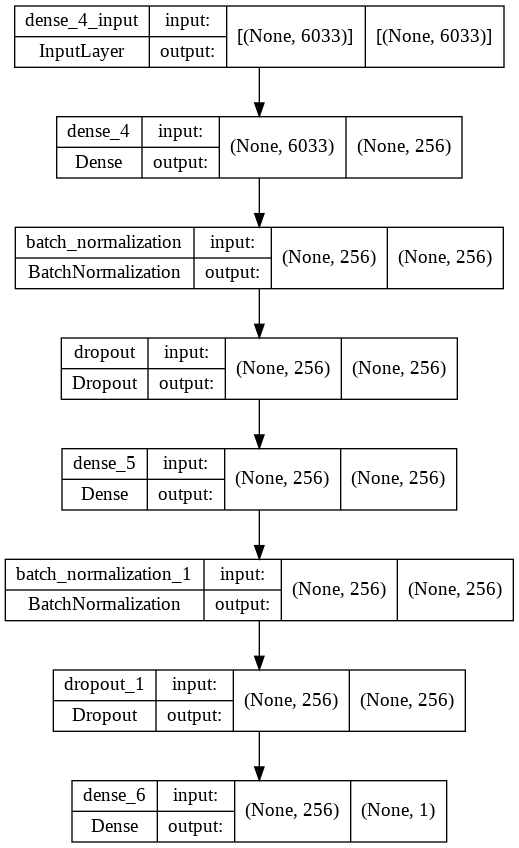

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
stopping = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 400, callbacks=[stopping])

Epoch 1/400
2/2 [==============================] - 4s 200ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_loss: 0.0000e+00 - val_accuracy: 0.2727
Epoch 2/400
2/2 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_loss: 0.0000e+00 - val_accuracy: 0.2727
Epoch 3/400
2/2 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_loss: 0.0000e+00 - val_accuracy: 0.2727
Epoch 4/400
2/2 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_loss: 0.0000e+00 - val_accuracy: 0.2727
Epoch 5/400
2/2 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_loss: 0.0000e+00 - val_accuracy: 0.2727
Epoch 6/400
2/2 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_loss: 0.0000e+00 - val_accuracy: 0.2727
Epoch 7/400
2/2 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.5510 - val_los

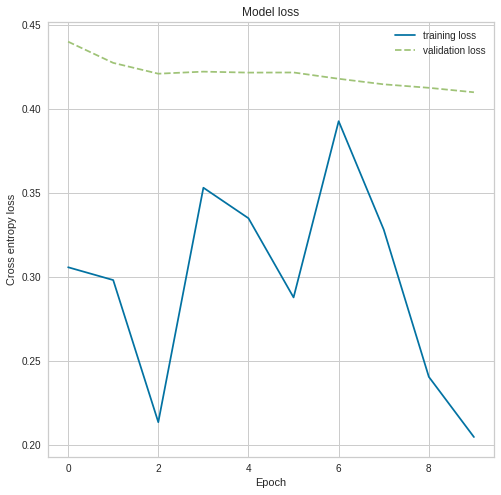

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss', linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Cross entropy loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

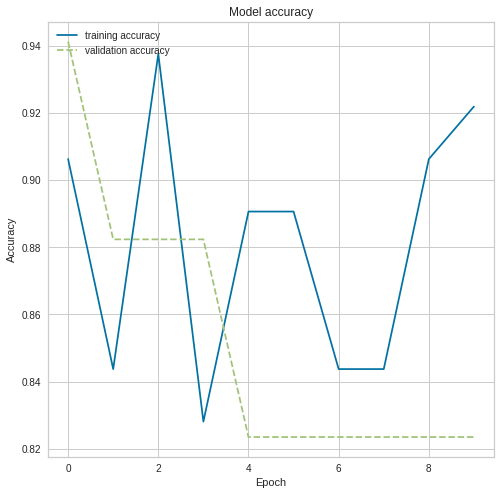

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy', linestyle='dashed')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction

array([[0.382],
       [0.162],
       [0.143],
       [0.315],
       [0.248],
       [0.415],
       [0.035],
       [0.846],
       [0.77 ],
       [0.873],
       [0.895],
       [0.516],
       [0.284],
       [0.376],
       [0.979],
       [0.353],
       [0.277],
       [0.18 ],
       [0.352],
       [0.401],
       [0.936],
       [0.1  ],
       [0.791],
       [0.587],
       [0.628],
       [0.977],
       [0.889],
       [0.917],
       [0.064],
       [0.881],
       [0.215]], dtype=float32)

In [ ]:
prediction_classes = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
prediction_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(Y_test,axis=1)[0:10]

In [ ]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes)

array([[31]])

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel())
x_train_res, X_val_res, Y_train_res, Y_val_res = train_test_split(X_train_res, y_train_res, 
                                                            test_size=0.2, random_state=42)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(x_train, 
                    Y_train, 
                    epochs=25, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=2, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=2, verbose=1)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
x_train_res, X_val_res, Y_train_res, Y_val_res = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(81, 101)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train_res.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy", f1_m, recall_m, precision_m])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               26112     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [ ]:
historyS = model.fit(x_train_res, 
                    Y_train_res, 
                    epochs=100, 
                    validation_data=(X_val_res, Y_val_res), 
                    callbacks=[ReduceLROnPlateau(patience=2, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=2, verbose=1)])

Epoch 1/100
2/2 [==============================] - 1s 316ms/step - loss: 1.0639 - accuracy: 0.4688 - f1_m: 0.5127 - recall_m: 0.4881 - precision_m: 0.5478 - val_loss: 0.6584 - val_accuracy: 0.5882 - val_f1_m: 0.5882 - val_recall_m: 0.7143 - val_precision_m: 0.5000 - lr: 1.0000e-04
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7745 - accuracy: 0.5781 - f1_m: 0.6188 - recall_m: 0.5941 - precision_m: 0.6458 - val_loss: 0.6396 - val_accuracy: 0.5882 - val_f1_m: 0.5882 - val_recall_m: 0.7143 - val_precision_m: 0.5000 - lr: 1.0000e-04
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 0.8564 - accuracy: 0.5312 - f1_m: 0.5757 - recall_m: 0.5409 - precision_m: 0.6203 - val_loss: 0.6175 - val_accuracy: 0.5882 - val_f1_m: 0.5882 - val_recall_m: 0.7143 - val_precision_m: 0.5000 - lr: 1.0000e-04
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 0.8027 - accuracy: 0.6406 - f1_m: 0.6528 - recall_m: 0.6103 - precision_m: 0.7024 - 

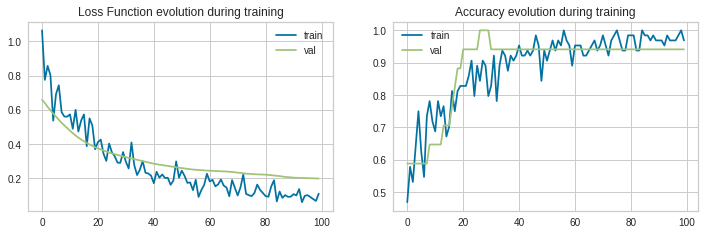

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(historyS.history['loss'], label='train')
plt.plot(historyS.history['val_loss'], label='val')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(historyS.history['accuracy'], label='train')
plt.plot(historyS.history['val_accuracy'], label='val')
plt.title('Accuracy evolution during training')
plt.legend()
#plt.savefig('/content/gdrive/MyDrive/dataset/smote_ANN_graph.png')

In [ ]:
train_predictions_baseline = model.predict(x_train_res) #batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test) #batch_size=BATCH_SIZE)

import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.3375509977340698
accuracy :  0.8571428656578064
f1_m :  0.8235293626785278
recall_m :  0.875
precision_m :  0.7777777910232544

Legitimate Transactions Detected (True Negatives):  11
Legitimate Transactions Incorrectly Detected (False Positives):  2
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  7
Total Fraudulent Transactions:  8


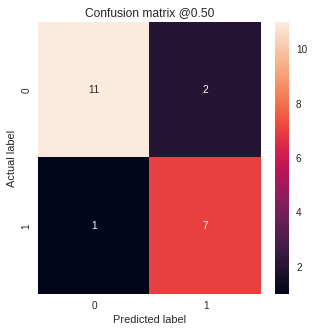

In [ ]:
baseline_results = model.evaluate(X_test, y_test,
                                  verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)
#plt.savefig('/content/gdrive/MyDrive/dataset/smote_ANN_conf.png')